In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os
import pandas as pd
import glob

In [2]:
os.getcwd()

'/Users/schmaelz/Documents/01_GITHUB/nomcomm/GITHUB_PAPERS_WORKING/littleprince_multilingual/scripts/00_PrepareData/Precun_pattern_extraction'

In [3]:
search_path              = "../../../data_lpp/fmri_data/extract_ts/lpp_cn_precun_pattern/*"

subjs_files = glob.glob(search_path, recursive = True)
#print(text_files[:2])
print(len(subjs_files))
subjs_files.sort()
#print(subjs_files[:5])

subjs = []
for i in range(len(subjs_files)):
        subjs.append(subjs_files[i][61:])
subjs[:3] 

33


['sub-CN001', 'sub-CN002', 'sub-CN003']

In [4]:
subjs = []
for i in range(len(subjs_files)):
        subjs.append(subjs_files[i][61:])
print(subjs[0])

sub-CN001


In [6]:
run1_all_patterns = []

for curr_sub in range(len(subjs)):

    folder_path = "../../../data_lpp/fmri_data/extract_ts/lpp_cn_precun_pattern/" + subjs[curr_sub] + '/*'

    text_files = glob.glob(folder_path, recursive = True)
    #print(len(text_files))
    text_files.sort()
    #print(text_files[0])#[-31:])
    
    f1 = np.load(text_files[0])
    #print(f1.shape)
    run1_all_patterns.append(f1)

print('done')

done


In [7]:
run1_all_patterns = np.asarray(run1_all_patterns)
run1_all_patterns.shape

(33, 283, 1193)

In [12]:
current_length = run1_all_patterns.shape[1]

res_mat = np.zeros((33,33))
for curr_sub1 in range(33):
        for curr_sub2 in range(33):
            instant_other_pattern = np.zeros((current_length))
            for i in range(current_length):
                        instant_other_pattern[i] = np.corrcoef(run1_all_patterns[curr_sub1,i,:],
                                                               run1_all_patterns[curr_sub2,i,:])[0,1]
            res_mat[curr_sub1, curr_sub2] = np.mean(instant_other_pattern)

#plt.plot(instant_other_pattern)
#plt.axhline( np.mean(instant_other_pattern), c = 'r');
#plt.show()

/var/folders/n8/p7l_d2b909q_62kkjh81kbpr0000gq/T/ipykernel_39190/715868027.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res_mask = np.where(np.tril(np.ones(res_mat.shape), k=-1).astype(np.bool), res_mat, np.nan);


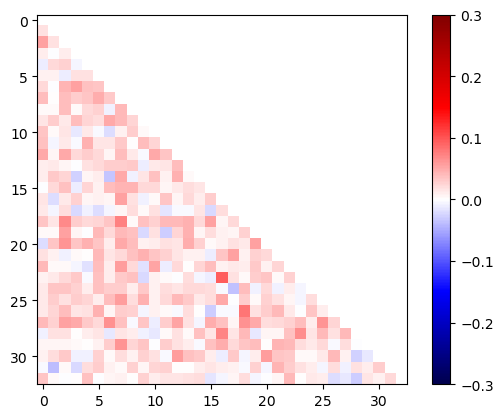

In [13]:
#this masks out the upper triangular and diagonal ...
res_mask = np.where(np.tril(np.ones(res_mat.shape), k=-1).astype(np.bool), res_mat, np.nan);

plt.imshow(res_mask, cmap= 'seismic', vmin = -0.3, vmax=0.3);
plt.colorbar();

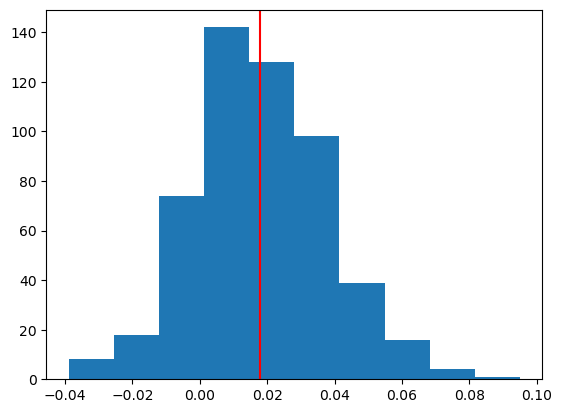

In [15]:
import nilearn
from nilearn import connectome
res_vec = nilearn.connectome.sym_matrix_to_vec(res_mat, discard_diagonal=True);
plt.hist(res_vec)
plt.axvline(np.mean(res_vec), c= 'r');


In [16]:
np.nanmean(res_mask)

0.01772603008637873

In [17]:
self_pattern = np.zeros((322,322))

for i in range(322):
    for j in range(322):
            self_pattern[i,j] = np.corrcoef(p1[i,:],
                                            p1[j,:])[0,1]


other_pattern = np.zeros((322,322))

for i in range(322):
    for j in range(322):
            other_pattern[i,j] = np.corrcoef(p1[i,:],
                                             p2[j,:])[0,1]

NameError: name 'p1' is not defined

In [ ]:
plt.imshow(self_pattern, cmap = 'seismic', vmin = -1, vmax=1); plt.colorbar();
plt.show()
plt.imshow(other_pattern, cmap = 'seismic', vmin = -1, vmax=1); plt.colorbar();

In [31]:
instant_other_pattern = np.zeros((322))
for i in range(322):
            instant_other_pattern[i] = np.corrcoef(p1[i,:],
                                             p2[i,:])[0,1]

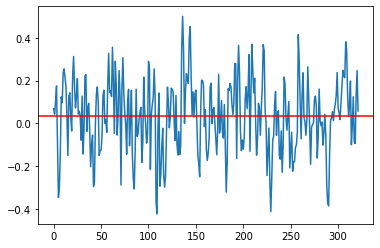

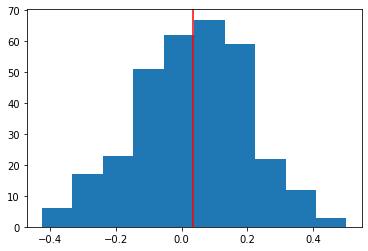

In [40]:
plt.plot(instant_other_pattern)
plt.axhline( np.mean(instant_other_pattern), c = 'r');
plt.show()

plt.hist(instant_other_pattern)
plt.axvline( np.mean(instant_other_pattern), c = 'r')